# `selection.XGBoostFeatureSelector`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.1


In [3]:
from slickml.selection import XGBoostFeatureSelector

help(XGBoostFeatureSelector)

Help on class XGBoostFeatureSelector in module slickml.selection._xgboost:

class XGBoostFeatureSelector(slickml.base._estimator.BaseXGBoostEstimator)
 |  XGBoostFeatureSelector(num_boost_round: Optional[int] = 200, sparse_matrix: Optional[bool] = False, scale_mean: Optional[bool] = False, scale_std: Optional[bool] = False, importance_type: Optional[str] = 'total_gain', params: Optional[Dict[str, Union[str, float, int]]] = None, n_iter: Optional[int] = 3, n_splits: Optional[int] = 4, metrics: Optional[str] = 'auc', early_stopping_rounds: Optional[int] = 20, nth_noise_threshold: Optional[int] = 1, random_state: Optional[int] = 1367, stratified: Optional[bool] = True, shuffle: Optional[bool] = True, verbose_eval: Optional[bool] = False, callbacks: Optional[bool] = False) -> None
 |  
 |  XGBoost Feature Selector.
 |  
 |  Notes
 |  -----
 |  This is a wrapper using XGBoost [xgboost-api]_ to perform a frequency-based feature selection
 |  algorithm with n-folds cross-validation on top of 

/Users/amirhessam/Desktop/GitHub/slick-ml/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Example 1: `XGBoostFetureSelector` for `classification` using `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer

clf_data = load_breast_cancer()
X_clf, y_clf = clf_data.data, clf_data.target

In [5]:
# custom params
params = {
    "eval_metric": "logloss",
    "learning_rate": 0.05,
    "max_depth": 3,
    "min_child_weight": 1,
    "gamma": 0.0,
}

xfs_clf = XGBoostFeatureSelector(
    n_iter=5,
    n_splits=4,
    metrics="auc",
    params=params,
)
xfs_clf.fit(X_clf, y_clf)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Iteration 1 *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 1/4 -- Train LOGLOSS = 0.045 -- Test LOGLOSS = 0.132 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 2/4 -- Train LOGLOSS = 0.495 -- Test LOGLOSS = 0.499 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 3/4 -- Train LOGLOSS = 0.147 -- Test LOGLOSS = 0.211 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 4/4 -- Train LOGLOSS = 0.309 -- Test LOGLOSS = 0.335 *-*-*-*-*-*-*-*-*-*-*-*
*-*-* Internal 4-Folds CV: -*-*- Train AUC = 0.998 +/- 0.002 -*-*- Test AUC = 0.986 +/- 0.002 *-*-*
*-*-* External 4-Folds CV: -*-*- Train LOGLOSS = 0.249 +/- 0.170 -*-*- Test LOGLOSS = 0.294 +/- 0.139 *-*-*

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Iteration 2 *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 1/4 -- Train LOGLOSS = 0.290 -- Test LOGLOSS = 0.362 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 2/4 -- Train LOGLOSS

In [6]:
# or xfs_clf.feature_frequency_
xfs_clf.get_feature_frequency()

,Feature,Frequency,Frequency (%)
0,F_1,20.0,100.0
1,F_21,20.0,100.0
2,F_22,20.0,100.0
3,F_23,20.0,100.0
4,F_26,20.0,100.0
5,F_27,20.0,100.0
6,F_7,20.0,100.0
7,F_13,19.0,95.0
8,F_20,19.0,95.0
9,F_24,17.0,85.0


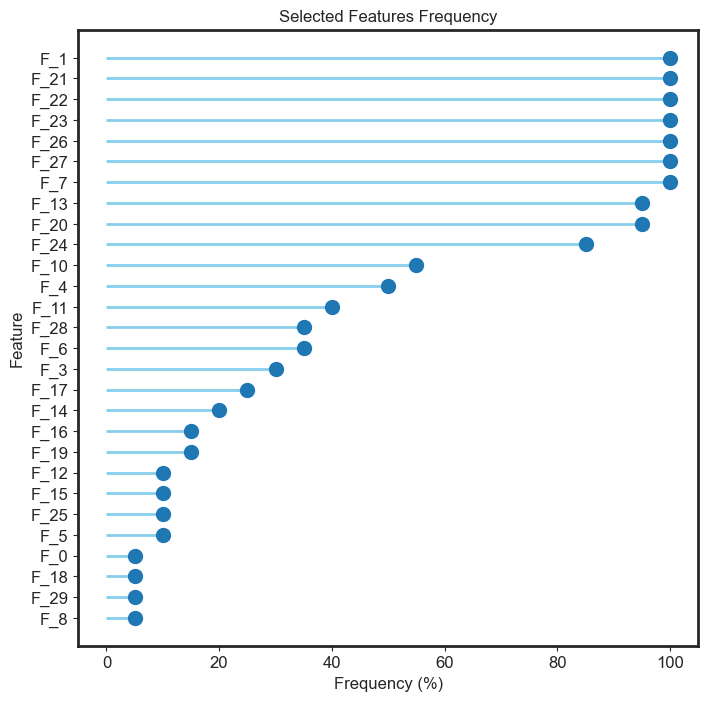

In [7]:
xfs_clf.plot_frequency(figsize=(8, 8))

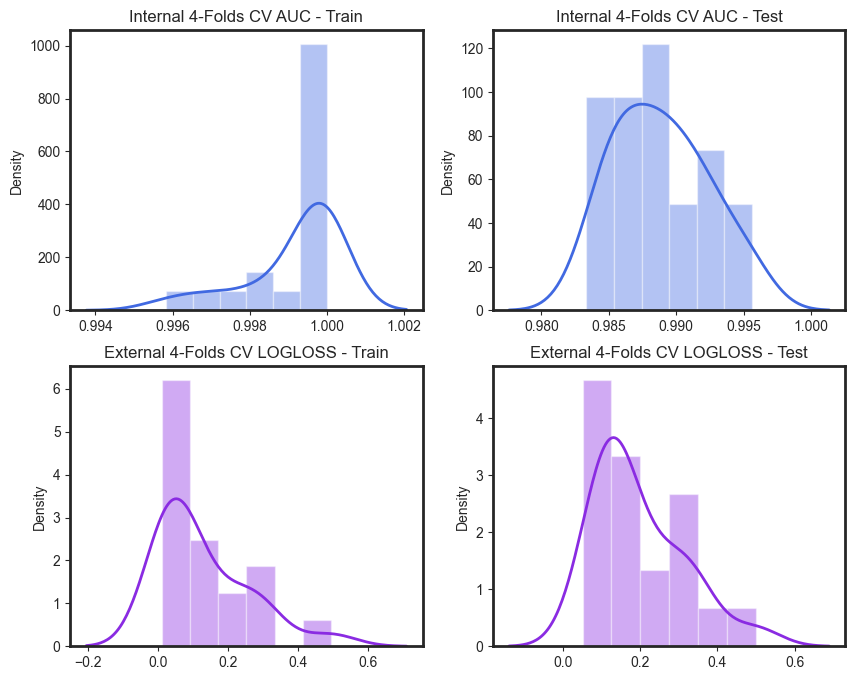

In [8]:
xfs_clf.plot_cv_results()

In [9]:
from IPython.display import display

# getting feature importance for each model
# or imps = xfs_clf.feature_importance_

imps = xfs_clf.get_feature_importance()
for key, val in imps.items():
    print(f"--- {key} ---")
    display(imps[key].head(5))

--- model_iter1_fold1 ---


,feature,total_gain
0,F_27,1828.273804
1,F_23,1189.917847
2,F_22,1022.641052
3,F_20,578.479187
4,F_7,531.704773


--- model_iter1_fold2 ---


,feature,total_gain
0,F_23,1035.270020
1,F_27,295.417847
2,F_20,214.336716
3,F_22,206.320602
4,F_7,175.195496


--- model_iter1_fold3 ---


,feature,total_gain
0,F_7,1711.638062
1,F_22,1501.207031
2,F_20,555.321167
3,F_23,488.814697
4,F_27,386.851013


--- model_iter1_fold4 ---


,feature,total_gain
0,F_27,1633.458008
1,F_22,1168.796387
2,F_20,402.115540
3,F_23,237.526337
4,F_1,48.797691


--- model_iter2_fold1 ---


,feature,total_gain
0,F_22,2256.601318
1,F_7,1122.902344
2,F_27,228.357681
3,F_26,88.566910
4,F_1,54.202820


--- model_iter2_fold2 ---


,feature,total_gain
0,F_20,1639.324463
1,F_22,1630.767822
2,F_23,392.561127
3,F_27,325.907227
4,F_7,149.685028


--- model_iter2_fold3 ---


,feature,total_gain
0,F_27,2494.136719
1,F_22,1418.060181
2,F_23,569.212219
3,F_7,341.783600
4,F_21,151.057968


--- model_iter2_fold4 ---


,feature,total_gain
0,F_23,2033.593872
1,F_7,1043.705322
2,F_27,872.024231
3,F_22,781.524963
4,F_21,214.699814


--- model_iter3_fold1 ---


,feature,total_gain
0,F_20,2248.955322
1,F_7,1149.658325
2,F_22,776.569275
3,F_23,609.723877
4,F_27,547.997131


--- model_iter3_fold2 ---


,feature,total_gain
0,F_27,1831.073608
1,F_22,1623.859619
2,F_20,994.107849
3,F_7,446.766357
4,F_23,335.680725


--- model_iter3_fold3 ---


,feature,total_gain
0,F_27,1750.893188
1,F_20,1712.395142
2,F_23,1078.531250
3,F_22,456.750641
4,F_7,229.789948


--- model_iter3_fold4 ---


,feature,total_gain
0,F_22,1572.677124
1,F_7,1133.890747
2,F_27,902.629272
3,F_23,135.445999
4,F_26,72.984726


--- model_iter4_fold1 ---


,feature,total_gain
0,F_27,3660.249512
1,F_22,695.313171
2,F_23,533.306152
3,F_7,299.600311
4,F_20,290.418549


--- model_iter4_fold2 ---


,feature,total_gain
0,F_23,1801.509644
1,F_22,1230.463379
2,F_27,1077.222046
3,F_7,876.439880
4,F_21,229.627930


--- model_iter4_fold3 ---


,feature,total_gain
0,F_20,2109.061035
1,F_22,1499.795776
2,F_27,369.151917
3,F_23,285.828583
4,F_7,135.043167


--- model_iter4_fold4 ---


,feature,total_gain
0,F_22,1627.765625
1,F_7,1523.983521
2,F_27,897.000549
3,F_23,817.616211
4,F_21,247.212372


--- model_iter5_fold1 ---


,feature,total_gain
0,F_22,2033.301392
1,F_27,1096.701294
2,F_7,853.154358
3,F_20,783.663147
4,F_23,383.829468


--- model_iter5_fold2 ---


,feature,total_gain
0,F_27,1626.935547
1,F_20,1195.728516
2,F_22,923.865662
3,F_7,664.021606
4,F_23,521.536926


--- model_iter5_fold3 ---


,feature,total_gain
0,F_22,1407.025513
1,F_23,1371.734741
2,F_27,1036.932739
3,F_7,1005.455566
4,F_20,632.671082


--- model_iter5_fold4 ---


,feature,total_gain
0,F_22,2539.123779
1,F_27,1429.379272
2,F_7,864.253845
3,F_21,335.253296
4,F_23,213.605606


In [10]:
# cross-validation results: interval cv reflects the `metrics`, and external cv reflects the `eval_mnetric`
# or xfs_clf.cv_results_
xfs_clf.get_cv_results()

,int_cv_train,int_cv_test,ext_cv_train,ext_cv_test
0,1.000000,0.987987,0.044502,0.131714
1,0.995832,0.983331,0.494572,0.499276
2,0.999615,0.986808,0.146976,0.210855
3,0.996673,0.986072,0.308612,0.335315
4,0.999142,0.992107,0.290392,0.361939
5,0.998275,0.986909,0.230293,0.277705
6,0.999385,0.988543,0.104373,0.174936
7,0.999334,0.984629,0.095012,0.112937
8,1.000000,0.994818,0.027517,0.140918
9,1.000000,0.991640,0.021010,0.109223


### Example 2: `XGBoostFetureSelector` for `regression` using `california-housing` data set

In [11]:
from sklearn.datasets import fetch_california_housing

reg_data = fetch_california_housing()
X_reg, y_reg = reg_data.data, reg_data.target

In [12]:
# custom params
params = {
    "eval_metric": "rmse",
    "learning_rate": 0.05,
    "max_depth": 3,
    "min_child_weight": 5,
    "gamma": 0.7,
}

xfs_reg = XGBoostFeatureSelector(
    n_iter=5,
    n_splits=4,
    metrics="mae",
    params=params,
)
xfs_reg.fit(X_reg, y_reg)

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Iteration 1 *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 1/4 -- Train RMSE = 0.522 -- Test RMSE = 0.550 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 2/4 -- Train RMSE = 0.522 -- Test RMSE = 0.551 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 3/4 -- Train RMSE = 0.531 -- Test RMSE = 0.533 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 4/4 -- Train RMSE = 0.527 -- Test RMSE = 0.540 *-*-*-*-*-*-*-*-*-*-*-*
*-*-* Internal 4-Folds CV: -*-*- Train MAE = 0.363 +/- 0.001 -*-*- Test MAE = 0.378 +/- 0.001 *-*-*
*-*-* External 4-Folds CV: -*-*- Train RMSE = 0.525 +/- 0.004 -*-*- Test RMSE = 0.544 +/- 0.007 *-*-*

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-* Iteration 2 *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 1/4 -- Train RMSE = 0.521 -- Test RMSE = 0.550 *-*-*-*-*-*-*-*-*-*-*-*
*-*-*-*-*-*-*-*-*-*-*-* Fold = 2/4 -- Train RMSE = 0.522 -- Test RMSE = 0.538 *-*-*-*-*

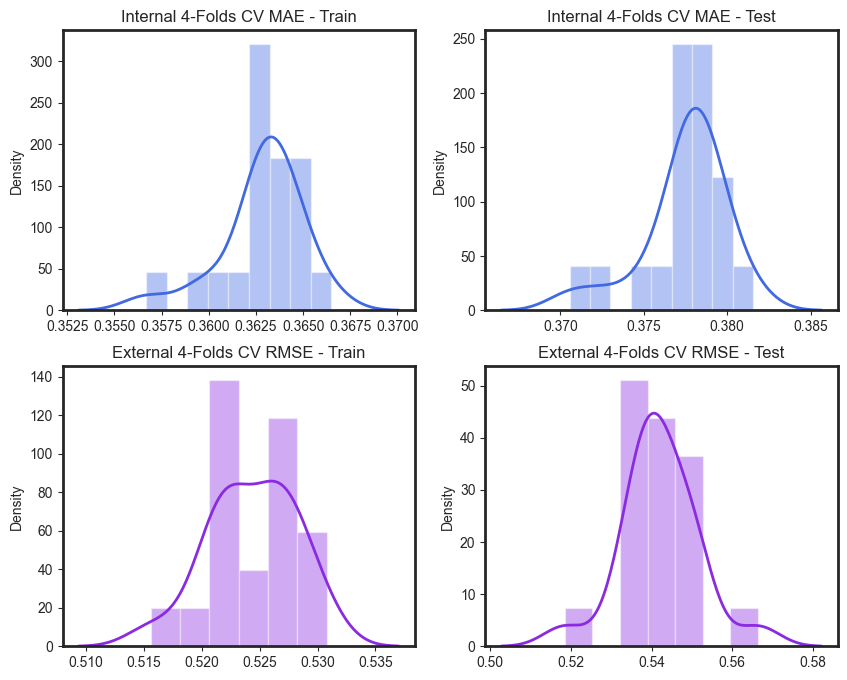

In [13]:
xfs_reg.plot_cv_results()

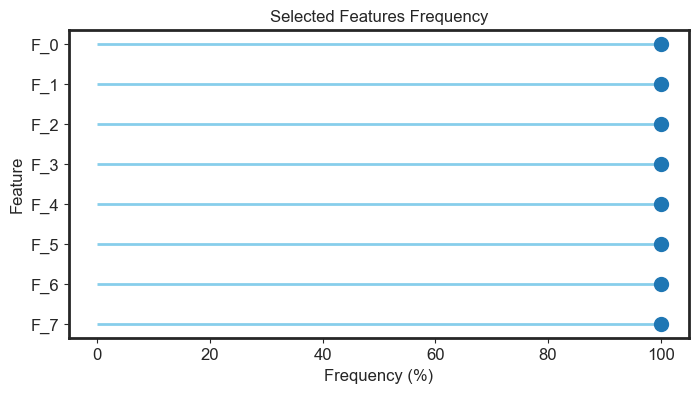

In [14]:
xfs_reg.plot_frequency()

In [15]:
xfs_reg.get_feature_frequency()

,Feature,Frequency,Frequency (%)
0,F_0,20.0,100.0
1,F_1,20.0,100.0
2,F_2,20.0,100.0
3,F_3,20.0,100.0
4,F_4,20.0,100.0
5,F_5,20.0,100.0
6,F_6,20.0,100.0
7,F_7,20.0,100.0


### Feel free to add your favorite `Example` via a `pull-request`.
### More details can be found in our [Contributing Document](https://github.com/slickml/slick-ml/blob/master/CONTRIBUTING.md).